# Python Datetime Review

#In time series analysis Most of our data will have a datatime index, so let's learn how to deal with this sort of data with pandas!

In [19]:
#import datetime library
from datetime import datetime

In [2]:
# To illustrate the order of arguments
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [21]:
# January 2nd, 2017    # Defaults to 0:00
my_date= datetime(my_year,my_month, my_day)
my_date

datetime.datetime(2017, 1, 2, 0, 0)

In [24]:
# January 2nd, 2017 at 13:30:15
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)
my_date_time

datetime.datetime(2017, 1, 2, 13, 30, 15)

In [25]:
#grab day from the my_date_time
my_date.day

2

In [27]:
#grab hour from the my_date_time
my_date_time.hour

13

# NumPy Datetime Arrays

NumPy handles dates more efficiently than Python's datetime format.
The NumPy data type is called datetime64 to distinguish it from Python's datetime.

In [28]:
#import numpy
import numpy as np

In [29]:
#CREATE AN ARRAY FROM THREE DATES
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64')

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

NOTE: We see the dtype listed as 'datetime64[D]'. This tells us that NumPy applied a day-level date precision.
If we want we can pass in a different measurement, such as [h] for hour or [Y] for year.

In [31]:
#creat array dtype=datetime64[Y]

np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[Y]')

array(['2016', '2017', '2018'], dtype='datetime64[Y]')

# NumPy Date Ranges
Just as np.arange(start,stop,step) can be used to produce an array of evenly-spaced integers, we can pass a dtype argument to obtain an array of dates. Remember that the stop date is exclusive.

In [33]:
# AN ARRAY OF DATES FROM 6/1/18 TO 6/22/18 SPACED ONE WEEK APART
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')


array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'], dtype='datetime64[D]')

# Pandas Datetime Index

In [34]:
#THE WEEK OF JULY 8TH, 2018   #The simplest way to build a DatetimeIndex is with the pd.date_range() method
import pandas as pd


In [35]:
#Convert to an index
some_dates = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')
some_dates
idx = pd.DatetimeIndex(some_dates)
idx

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

In [36]:
#Create some random data
data = np.random.randn(3,2)
cols = ['A','B']


[[ 1.56416353 -0.14245153]
 [ 0.03281964  0.65377452]
 [-0.89056    -0.1246309 ]]


In [40]:
#Create a DataFrame with our random data, our date index, and our columns
df = pd.DataFrame(data,idx,cols)
df
#df.index

,A,B
2016-03-15,1.564164,-0.142452
2017-05-24,0.032820,0.653775
2018-08-09,-0.890560,-0.124631


In [41]:
#Latest Date Value
df.index.max()

Timestamp('2018-08-09 00:00:00')

In [42]:
#Latest Date Index Location
df.index.argmax()

2

In [43]:
#Earliest Date Value
df.index.min()

Timestamp('2016-03-15 00:00:00')

In [44]:
#Earliest Date Index Location
df.index.argmin()

0

# Time Resampling

In [45]:
import pandas as pd
%matplotlib inline

In [46]:
#read Starbucks stock data from 2015 to 2018 which includes daily closing prices and trading volumes
df= pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)

In [47]:
#check the first few rows
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


A common operation with time series data is resampling based on the time series index

In [49]:
# Our index
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [50]:
#resample the data by mean
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


We're not limited to pandas built-in summary functions (min/max/mean etc.). We can define our own function

In [ ]:
#def first_day(entry):
    """
   Returns the first instance of the period, regardless of sampling rate.
    """
    #if len(entry):  # handles the case of missing data
        #return entry[0]

In [ ]:
#resample the data based on provided function


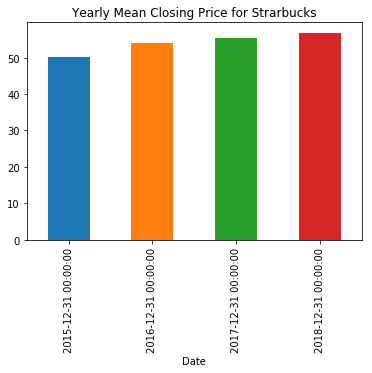

In [51]:
#use barplot to show the closing price of year end frequency. set the title as well.
df['Close'].resample('A').mean().plot.bar(title='Yearly Mean Closing Price for Strarbucks')

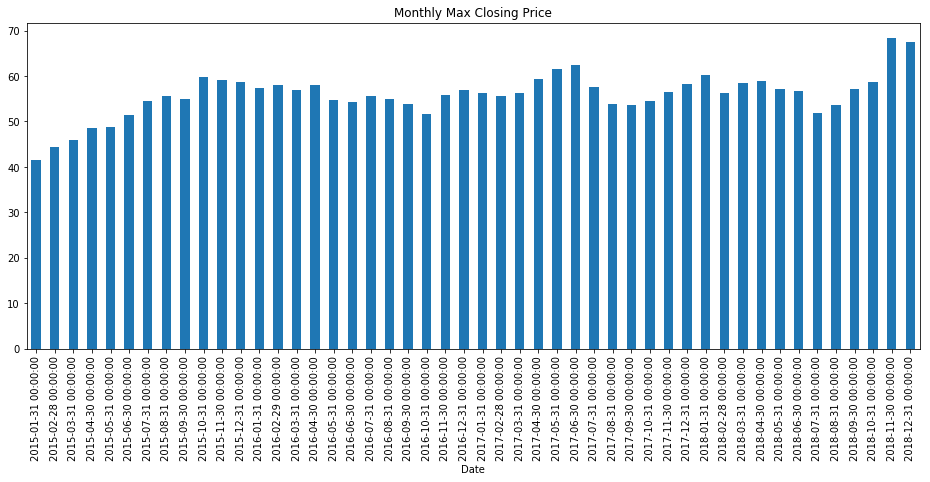

In [52]:
#use barplot to show the closing price of month end frequency. set the title as well.
title ='Monthly Max Closing Price'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title, color = '#1f77b4')

# Time_Shifting

Sometimes you may need to shift all your data up or down along the time series index.

In [ ]:
import pandas as pd

In [ ]:
#read Starbucks stock data from 2015 to 2018 which includes daily closing prices and trading volumes
df= pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)

In [53]:
#expelore first and last few rows
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [54]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [55]:
#shift forward by 1. entire your database
#This method shifts the entire date index a given number of rows, without regard for time periods (months & years)
#NOTE: You will lose that last piece of data that no longer has an index!
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [56]:
#shift backwards by 1. entire your database
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


# Shifting based on Time Series Frequency Code

We can choose to shift index values up or down without realigning the data by passing in a freq argument.
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end.

In [63]:
## Shift everything forward one month
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


# Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a simple moving average.

########If I use the expanding window with initial size 1, I will create a window that in the first step contains only the first row. In the second step, it contains both the first and the second row. In every step, one additional row is added to the window, and the aggregating function is being recalculated################

Rolling windows are totally different. In this case, we specify the size of the window which is moving. What happens when I set the rolling window size to 2?

In the first step, it is going to contain the first row and one undefined row, so I am going to get NaN as a result.

In the second step, the window moves and now contains the first and the second row. Now it is possible to calculate the aggregate function. In the case of this example, the sum of both rows.

In the third step, the window moves again and no longer contains the first row. Instead of that now it calculates the sum of the second and the third row.

In [64]:
import pandas as pd
%matplotlib inline

In [66]:
#read the same database (Starbucks)
df= pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)

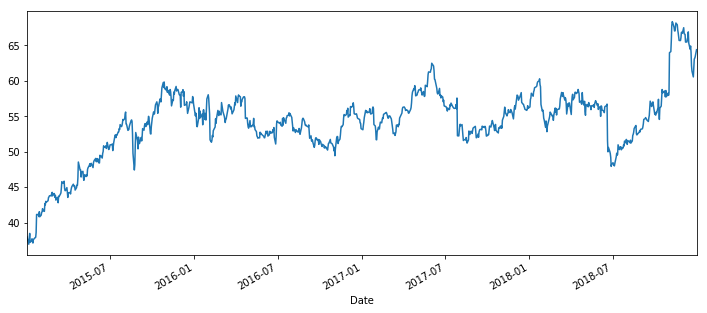

In [69]:
#visualize the closing price for entire database with line plot
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window

In [71]:
# 7 day rolling mean
df.rolling(window=7).mean().head(15)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


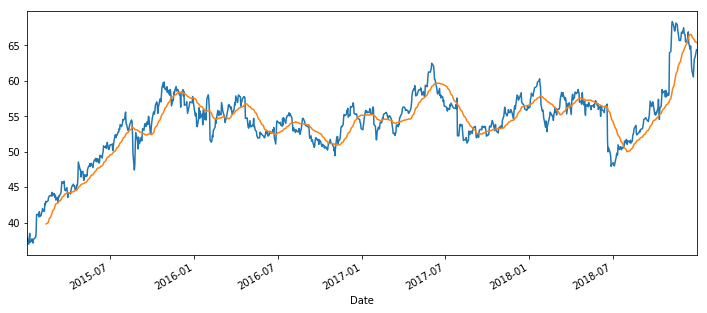

In [72]:
#visualize the closing price for entire database with line plot over rolling database
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Close'].plot()

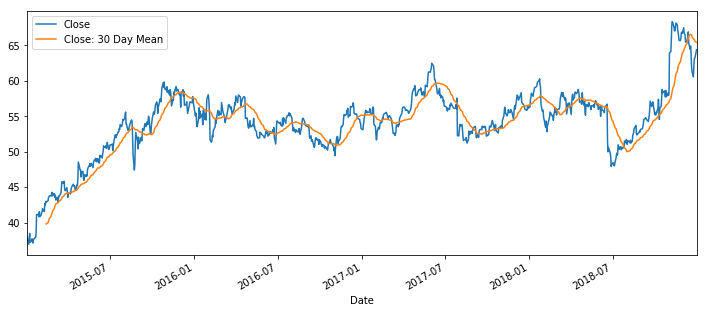

In [73]:
#add legend to your plot
#The easiest way to add a legend is to make the rolling value a new column, then pandas does it automatically!
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

# Expanding
Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

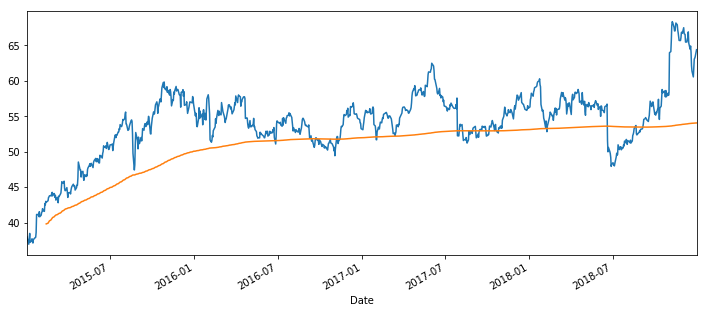

In [76]:
#visualize the closing price for entire database with line plot over expanding database
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5));

# Visualizing Time Series Data

In [77]:
import pandas as pd
%matplotlib inline

In [79]:
#show that dates are already parsed
df= pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [80]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

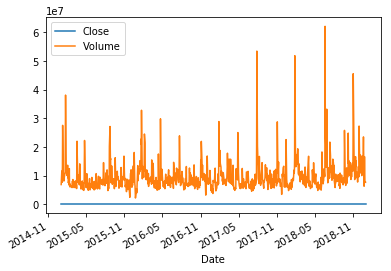

In [81]:
#create a line plot that puts both 'Close' and 'Volume' on the same graph
df.plot()

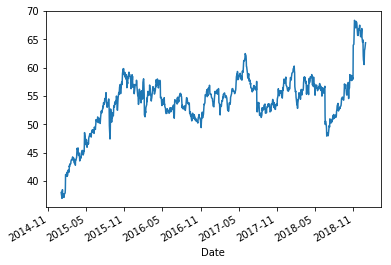

In [82]:
#As you can see this isn't very helpful due to the difference in y-values, so we'll split them up.
#visualize the closing price only
df['Close'].plot()

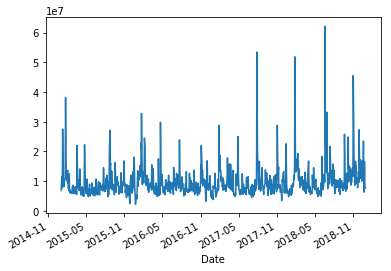

In [83]:
#visualize the volume only
df['Volume'].plot()

There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into df.plot().

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

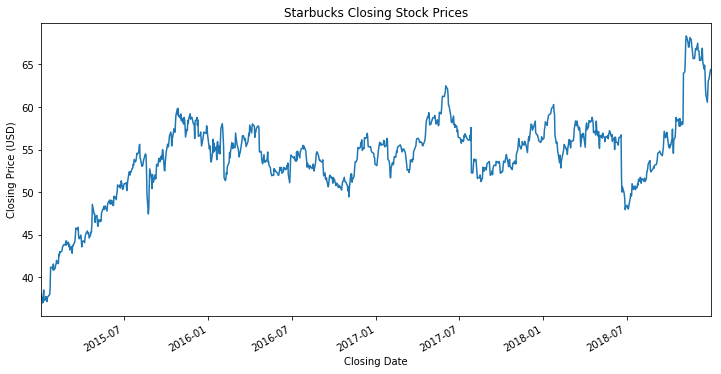

In [84]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# X Limits

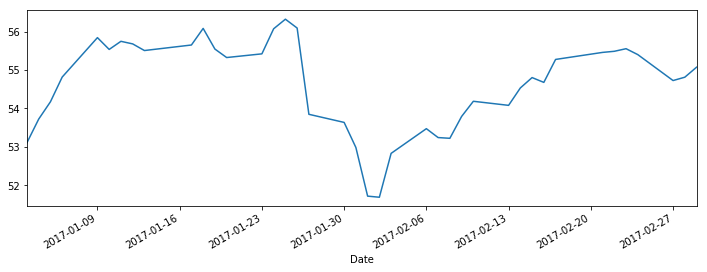

In [85]:
#choosing Xlimits by slice, Dates are separated by a colon
df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12,4)).autoscale(axis='x', tight=True)

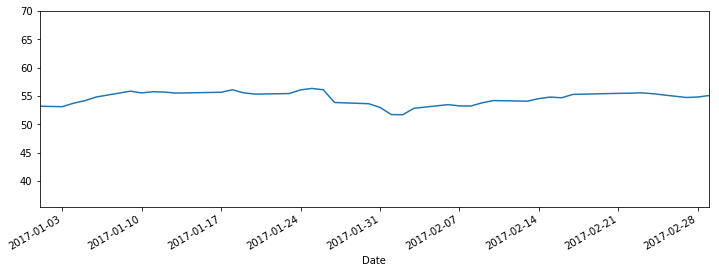

In [87]:
#Choosing X Limits by Argument
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01']);

In [88]:
#FIND THE MINIMUM VALUE IN THE RANGE
df.loc['2017-01-01': '2017-03-01']['Close'].min()

51.689900000000002

In [89]:
#FIND THE MAXIMUM VALUE IN THE RANGE
df.loc['2017-01-01': '2017-03-01']['Close'].max()

56.324399999999997

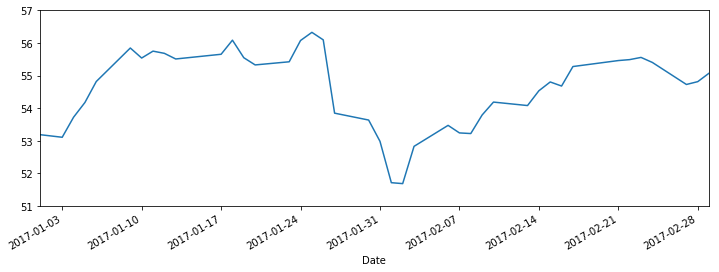

In [90]:
#PLUG THESE IN AS Y-LIMIT VALUES (set the y-limit)
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'], ylim=[51,57])

# X Ticks

In this section we'll look at how to change the format and appearance of dates along the x-axis. To do this,
we'll borrow a tool from matplotlib called dates.

In [91]:
from matplotlib import dates

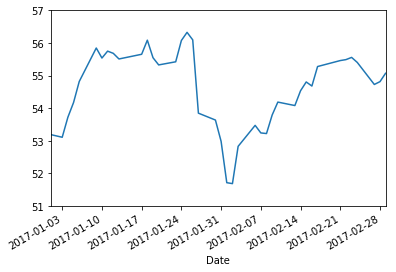

In [92]:
#CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57])

In [ ]:
#REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')

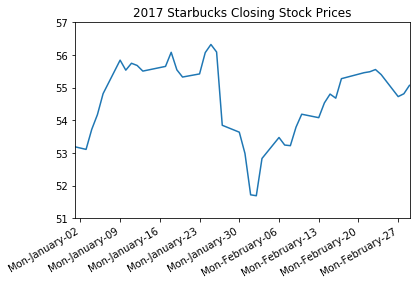

In [94]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

Notice that dates are spaced one week apart. The dates themselves correspond with byweekday=0, or Mondays.
For a full list of locator options available from matplotlib.dates visit https://matplotlib.org/api/dates_api.html#date-tickers

In [ ]:
# USE THIS SPACE TO EXPERIMENT WITH DIFFERENT FORMATS
#You can find out all the formatting option from this link https://strftime.org/


All of the tick marks we've used so far have belonged to the major axis. We can assign another level called the minor axis, perhaps to separate month names from days of the month.

# Pandas Time Series Exercise

In [95]:
# RUN THIS CELL
import pandas as pd
%matplotlib inline

In [96]:
#read monthly_milk_production csv file 
import pandas as pd
%matplotlib inline

df = pd.read_csv('monthly_milk_production.csv')
title = "Monthly milk production: pounds per cow. Jan '62 - Dec '75"



168
      Date  Production
0  1962-01         589
1  1962-02         561
2  1962-03         640
3  1962-04         656
4  1962-05         727


In [97]:
#print out len and head of our dataframe
print(len(df))
print(df.head())

168
      Date  Production
0  1962-01         589
1  1962-02         561
2  1962-03         640
3  1962-04         656
4  1962-05         727


In [98]:
#1. What is the current data type of the Date column?
df.dtypes

Date          object
Production     int64
dtype: object

In [99]:
#2. Change the Date column to a datetime format
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date          datetime64[ns]
Production             int64
dtype: object

In [100]:
#3. Set the Date column to be the new index
df.set_index('Date',inplace=True)
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


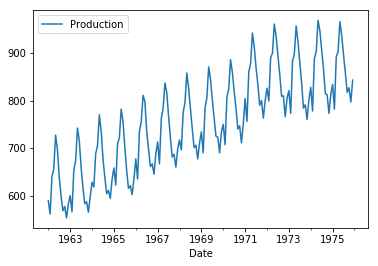

In [101]:
#4. Plot the DataFrame with a simple line plot. What do you notice about the plot?
df.plot();

In [102]:
#5. Add a column called 'Month' that takes the month value from the index
df['Month']=df.index.month
df.head()

,Production,Month
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5


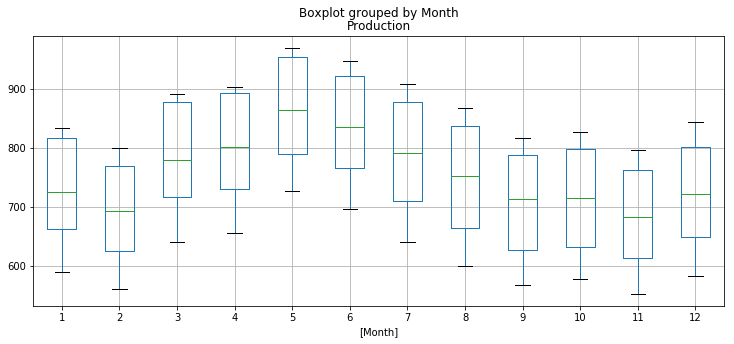

In [103]:
#6. Create a BoxPlot that groups by the Month field
df.boxplot(by='Month',figsize=(12,5));

In [104]:
#7. Read in the data UMTMVS.csv file from the Data folder
df = pd.read_csv('UMTMVS.csv')

In [105]:
#8. Check the head of the data
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


In [106]:
#9. Set the DATE column as the index
df = df.set_index('DATE')

In [107]:
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [108]:
#10. Check the data type of the index
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
       '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01'],
      dtype='object', name='DATE', length=342)

In [109]:
#11. Convert the index to be a datetime index.
df.index = pd.to_datetime(df.index)

In [110]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', name='DATE', length=342, freq=None)

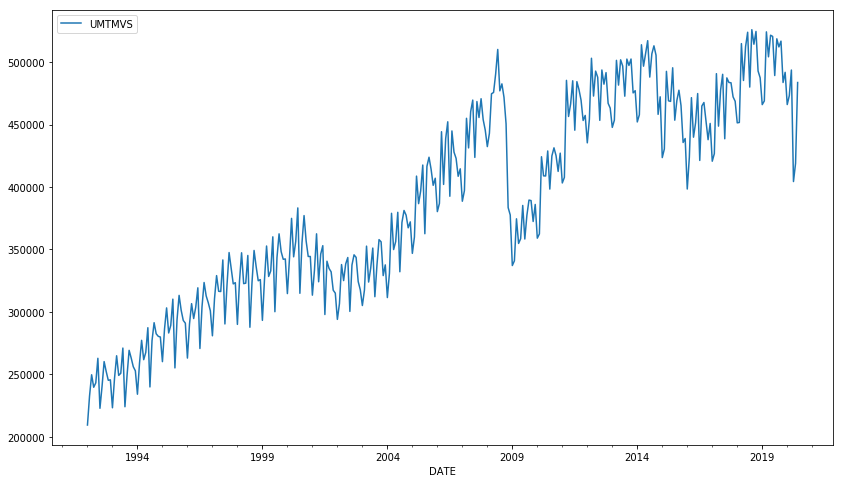

In [111]:
#12. Plot out the data, choose a reasonable figure size
df.plot(figsize=(14,8))

In [112]:
#13. What was the percent increase in value from Jan 2009 to Jan 2019?
100 * (df.loc['2019-01-01'] - df.loc['2009-01-01']) / df.loc['2009-01-01']

UMTMVS    38.213473
dtype: float64

In [113]:
#14. What was the percent decrease from Jan 2008 to Jan 2009?
100 * (df.loc['2009-01-01'] - df.loc['2008-01-01']) / df.loc['2008-01-01']

UMTMVS   -22.022775
dtype: float64

In [114]:
#15. What is the month with the least value after 2005?
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

In [115]:
#16. What 6 months have the highest value?
df.sort_values(by='UMTMVS',ascending=False).head(5)

,UMTMVS
DATE,
2018-08-01,525899.0
2018-10-01,524492.0
2019-03-01,524161.0
2018-06-01,523850.0
2019-05-01,521475.0


In [116]:
#17. How many millions of dollars in value was lost in 2008?
df.loc['2008-01-01'] - df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

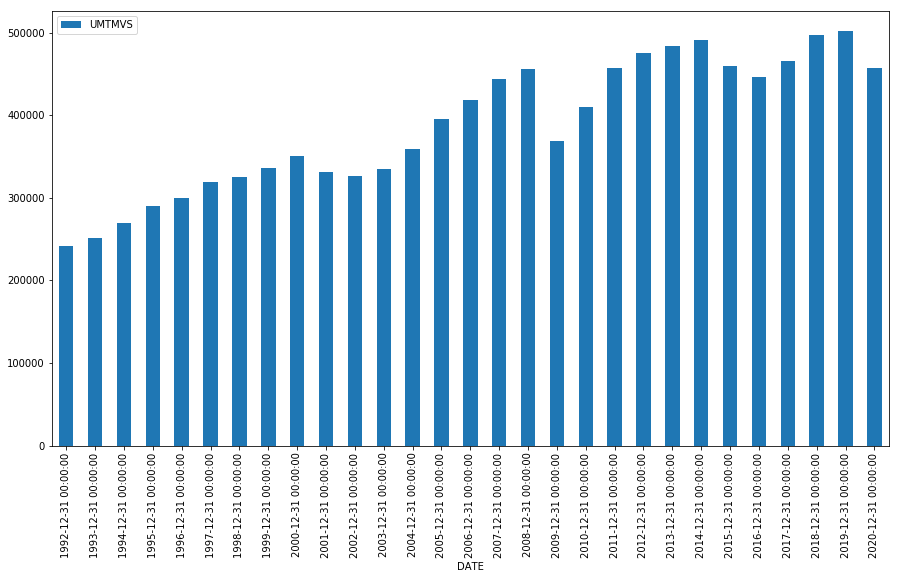

In [117]:
#18. Create a bar plot showing the average value in millions of dollars per year
df.resample('Y').mean().plot.bar(figsize=(15,8))

In [119]:
#19. What year had the biggest increase in mean value from the previous year's mean value?
yearly_data = df.resample('Y').mean()
yearly_data_shift = yearly_data.shift(1)


In [120]:
yearly_data.head()

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


In [121]:
change = yearly_data - yearly_data_shift 

In [122]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

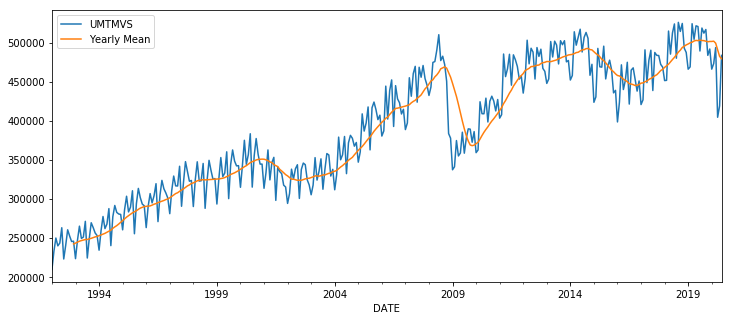

In [123]:
#20. Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there
#are 12 months in a year!
df['Yearly Mean'] = df['UMTMVS'].rolling(window=12).mean()
df[['UMTMVS','Yearly Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);